<p>This is a paragraph containing <b>bold text</b></p>

### Python module/package imports for this chapter

In [7]:
import os, sys, collections, re, json, io, base64

In [8]:
import numpy as np

import matplotlib
import matplotlib.pyplot as pp
import matplotlib.animation as anim
from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [9]:
import requests
import bs4      # BeautifulSoup 4

In [10]:
import IPython.display
import PIL, PIL.Image, PIL.ImageOps, PIL.ImageEnhance  # Python Imaging Library - now "pillow"

### Data needed from previous videos

In [11]:
images = requests.get('http://mars.nasa.gov/msl/multimedia/raw',
                      params = {'s': '1460', 'camera': 'FHAZ'})
htmlpage = images.text

# if internet is not available or NASA's webserver is unresponsive,
# the same webpage can be found in the exercise files, and loaded with
# htmlpage = json.load(open('sol1460.json','r'))

## Parsing HTML with `BeautifulSoup`

In [12]:
soup = bs4.BeautifulSoup(htmlpage,'lxml')

In [13]:
soup

<!DOCTYPE html>
<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<!-- Always force latest IE rendering engine or request Chrome Frame -->
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<script type="text/javascript">window.NREUM||(NREUM={});NREUM.info={"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"5e33925808","applicationID":"59562082","transactionName":"JVcPR0MLWApSRU1eAQVVEhxSC1oSUlkWbBMHXwRAHhdcCUA=","queueTime":0,"applicationTime":643,"agent":""}</script>
<script type="text/javascript">(window.NREUM||(NREUM={})).loader_config={xpid:"VQcPUlZTDxAFXVRUBQEPVA==",licenseKey:"5e33925808",applicationID:"59562082"};window.NREUM||(NREUM={}),__nr_require=function(t,n,e){function r(e){if(!n[e]){var o=n[e]={exports:{}};t[e][0].call(o.exports,function(n){var o=t[e][1][n];return r(o||n)},o,o.exports)}return n[e].exports}if("function"==typeof __nr_require)retu

In [14]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <!-- Always force latest IE rendering engine or request Chrome Frame -->
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <script type="text/javascript">
   window.NREUM||(NREUM={});NREUM.info={"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"5e33925808","applicationID":"59562082","transactionName":"JVcPR0MLWApSRU1eAQVVEhxSC1oSUlkWbBMHXwRAHhdcCUA=","queueTime":0,"applicationTime":643,"agent":""}
  </script>
  <script type="text/javascript">
   (window.NREUM||(NREUM={})).loader_config={xpid:"VQcPUlZTDxAFXVRUBQEPVA==",licenseKey:"5e33925808",applicationID:"59562082"};window.NREUM||(NREUM={}),__nr_require=function(t,n,e){function r(e){if(!n[e]){var o=n[e]={exports:{}};t[e][0].call(o.exports,function(n){var o=t[e][1][n];return r(o||n)},o,o.exports)}return n[e].exports}if("function"==ty

In [15]:
soup.head

<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<!-- Always force latest IE rendering engine or request Chrome Frame -->
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<script type="text/javascript">window.NREUM||(NREUM={});NREUM.info={"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"5e33925808","applicationID":"59562082","transactionName":"JVcPR0MLWApSRU1eAQVVEhxSC1oSUlkWbBMHXwRAHhdcCUA=","queueTime":0,"applicationTime":643,"agent":""}</script>
<script type="text/javascript">(window.NREUM||(NREUM={})).loader_config={xpid:"VQcPUlZTDxAFXVRUBQEPVA==",licenseKey:"5e33925808",applicationID:"59562082"};window.NREUM||(NREUM={}),__nr_require=function(t,n,e){function r(e){if(!n[e]){var o=n[e]={exports:{}};t[e][0].call(o.exports,function(n){var o=t[e][1][n];return r(o||n)},o,o.exports)}return n[e].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o<e.length;o++)r(e[o]);return r}({1:[function(t,n,e){fun

In [16]:
soup.title

<title>Raw Images | Multimedia – NASA’s Mars Exploration Program </title>

In [17]:
type(soup.title)

bs4.element.Tag

In [18]:
soup.title.name

'title'

In [19]:
soup.title.contents

['Raw Images | Multimedia – NASA’s Mars Exploration Program ']

In [20]:
soup.title.text

'Raw Images | Multimedia – NASA’s Mars Exploration Program '

In [21]:
soup.title.string

'Raw Images | Multimedia – NASA’s Mars Exploration Program '

In [22]:
soup.img

<img alt="" class="print_only print_logo" src="/assets/logo_mars_trio_black@2x.png"/>

In [23]:
soup.img.attrs

{'alt': '',
 'class': ['print_only', 'print_logo'],
 'src': '/assets/logo_mars_trio_black@2x.png'}

In [25]:
soup.img['src'], soup.img['alt']

('/assets/logo_mars_trio_black@2x.png', '')

In [35]:
soup.section.contents[:6]

['\n',
 <div alt="Mars Curiosity Rover" class="custom_banner_container" style="background-image: url('/internal_resources/584');">
 <div class="banner_header_overlay">
 <h1 class="article_title">
 Mars Curiosity Rover
 </h1>
 </div>
 <div class="gradient_container_top"></div>
 <div class="gradient_container_bottom"></div>
 </div>,
 '\n']

In [38]:
soup.div.parent

<body class="megasection_nav_present msl" id="raw-images">
<svg display="none" height="0" width="0">
<symbol height="30" id="circle_plus" viewbox="0 0 30 30" width="30">
<g fill-rule="evenodd" transform="translate(1 1)">
<circle cx="14" cy="14" fill="#fff" fill-opacity=".1" fill-rule="nonzero" r="14" stroke="inherit" stroke-width="1"></circle>
<path class="the_plus" d="m18.856 12.96v1.738h-4.004v3.938h-1.848v-3.938h-4.004v-1.738h4.004v-3.96h1.848v3.96z" fill="inherit" stroke-width="0"></path>
</g>
</symbol>
<symbol height="30" id="circle_arrow" viewbox="0 0 30 30" width="30" xmlns="http://www.w3.org/2000/svg">
<g transform="translate(1 1)"><circle cx="14" cy="14" fill="#fff" fill-opacity=".1" r="14" stroke="inherit" stroke-width="1"></circle>
<path class="the_arrow" d="m8.5 15.00025h7.984l-2.342 2.42c-.189.197-.189.518 0 .715l.684.717c.188.197.494.197.684 0l4.35-4.506c.188-.199.188-.52 0-.717l-4.322-4.48c-.189-.199-.496-.199-.684 0l-.684.716c-.189.197-.189.519 0 .716l2.341 2.419h-8.011

In [39]:
for p in soup.div.parents:
    print(p.name)

body
html
[document]


In [40]:
soup.find_all('img')

[<img alt="" class="print_only print_logo" src="/assets/logo_mars_trio_black@2x.png"/>,
 <img alt="twitter" src="/assets/twitter_icon@2x.png"/>,
 <img alt="facebook" src="/assets/facebook_icon@2x.png"/>]

In [44]:
imgs = ['http://mars.jpl.nasa.gov' + img['src'] for img in soup.find_all('img')]

In [45]:
imgs

['http://mars.jpl.nasa.gov/assets/logo_mars_trio_black@2x.png',
 'http://mars.jpl.nasa.gov/assets/twitter_icon@2x.png',
 'http://mars.jpl.nasa.gov/assets/facebook_icon@2x.png']

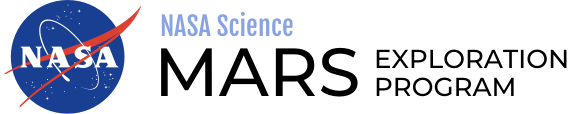

In [46]:
IPython.display.Image(imgs[0])

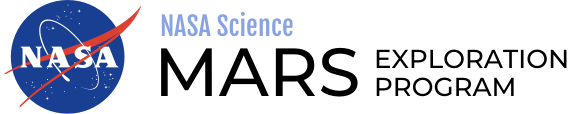

In [47]:
IPython.display.Image(re.sub('-thm','',imgs[0]))